In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
### Import data into a pandas dataframe, note that the separator is a ';' instead of the typical ','
cars = pd.read_csv("~/Downloads/original cars.csv", sep=";")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\kater/Downloads/original cars.csv'

In [4]:
cars.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US


In [5]:
### Correlation

In [6]:
### Basic correlation statistics
corr = cars.corr()
corr

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model
MPG,1.000000,-0.735563,-0.764277,-0.726670,-0.787510,0.424490,0.586234
Cylinders,-0.735563,1.000000,0.951787,0.823467,0.895220,-0.522452,-0.360762
Displacement,-0.764277,0.951787,1.000000,0.873758,0.932475,-0.557984,-0.381714
Horsepower,-0.726670,0.823467,0.873758,1.000000,0.840811,-0.682047,-0.419929
Weight,-0.787510,0.895220,0.932475,0.840811,1.000000,-0.430086,-0.315389
Acceleration,0.424490,-0.522452,-0.557984,-0.682047,-0.430086,1.000000,0.301992
Model,0.586234,-0.360762,-0.381714,-0.419929,-0.315389,0.301992,1.000000


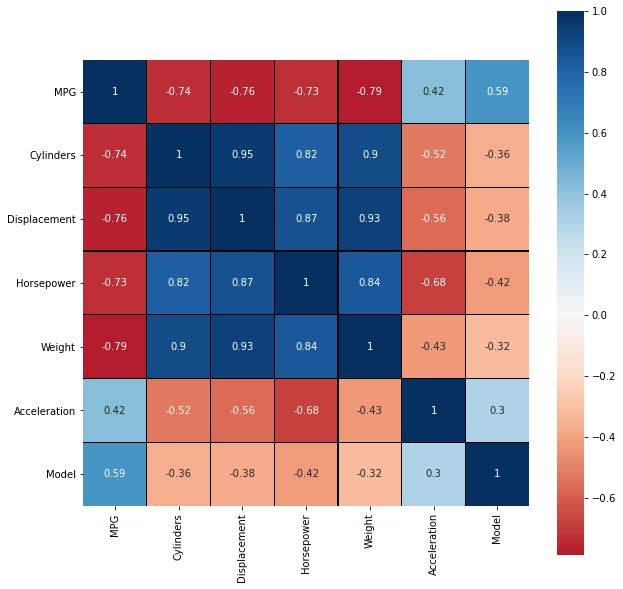

In [7]:
# Correlation heat plot
plt.figure(figsize=(10,10))

sns.heatmap(corr,
            center=0,
            linewidths=.1,
            annot=True,
            linecolor ='black',
            cmap = 'RdBu',
            square=True)

In [8]:
### Scatterplot Matrix

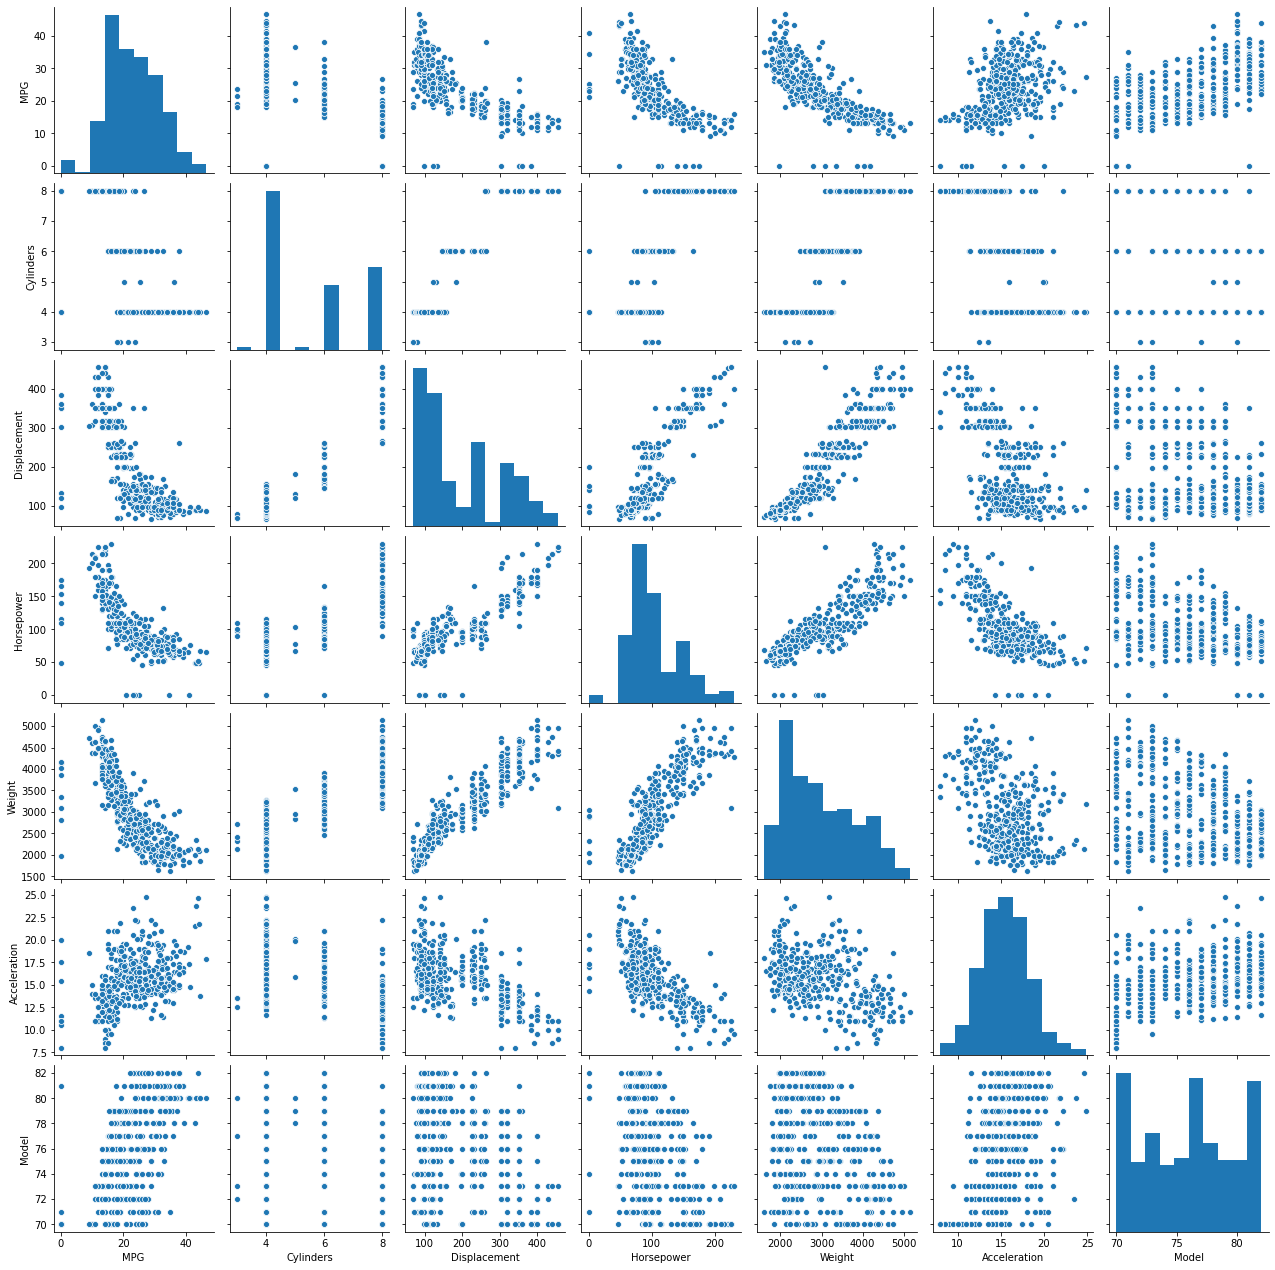

In [9]:
### Scatter Plot Matrix
sns.pairplot(cars)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


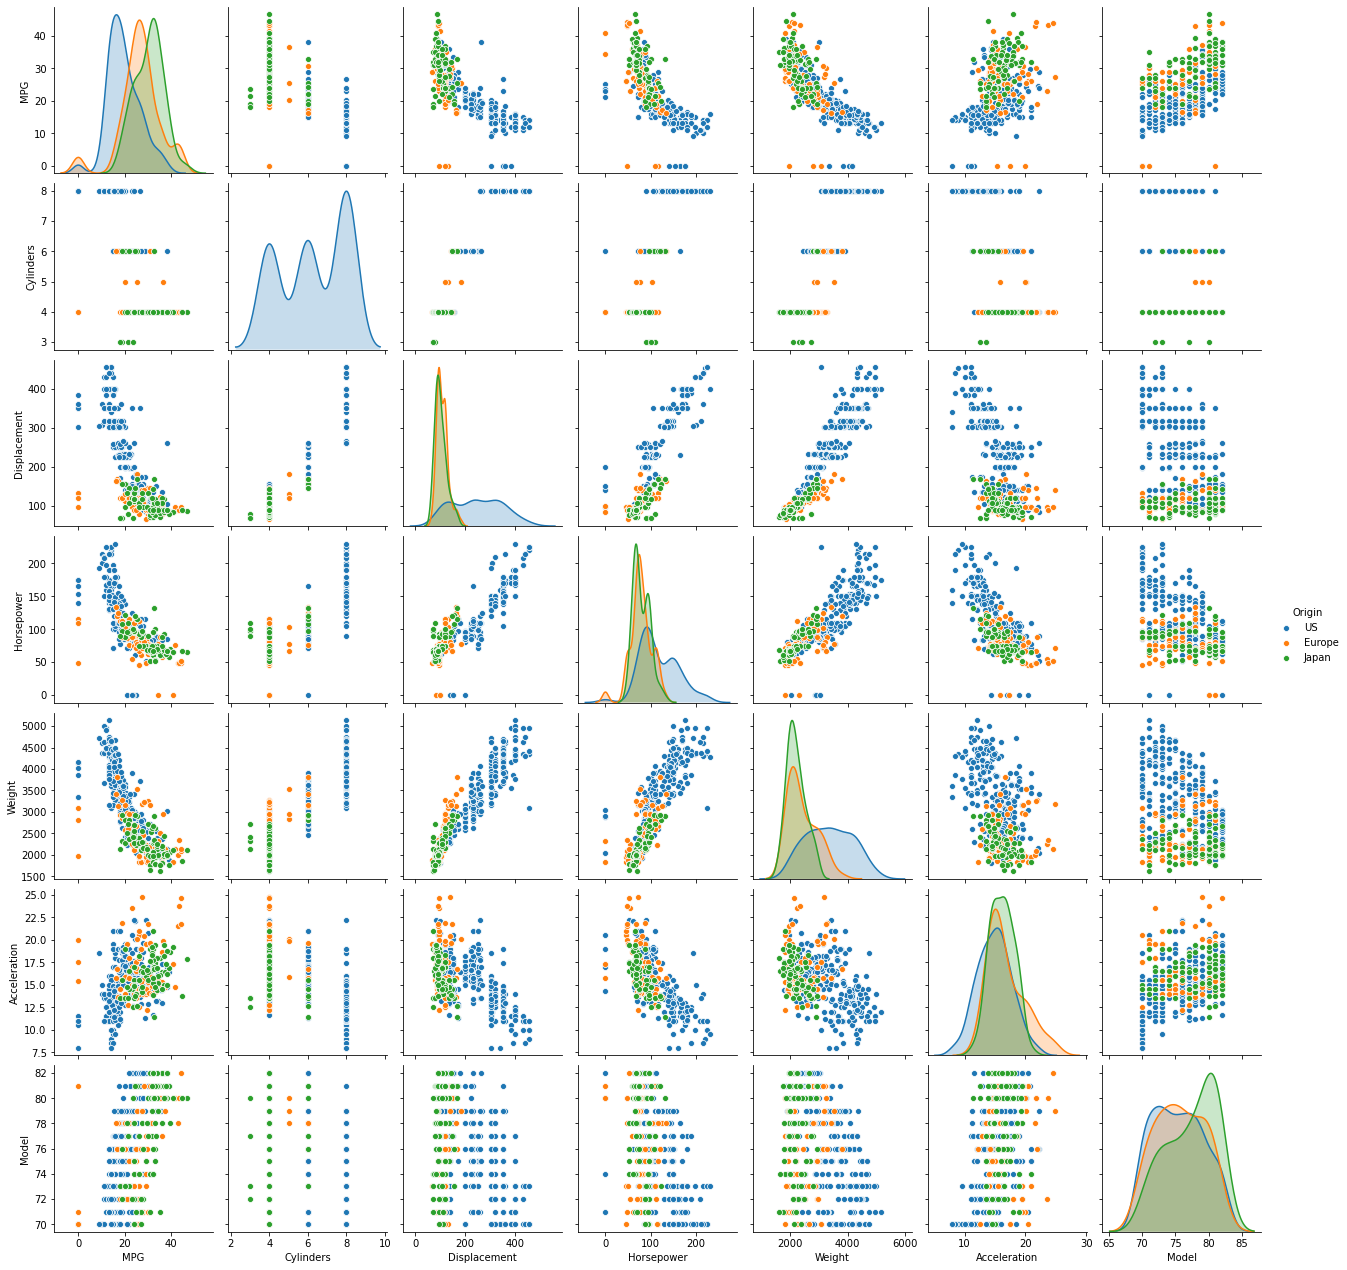

In [10]:
sns.pairplot(cars, 
             hue='Origin')

In [15]:

fig = px.scatter_matrix(cars,
                        dimensions = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                                      'Acceleration', 'Model'],
                        color="Origin",
                        width=1000, 
                        height=1000)
fig.show()

In [11]:
### Parallel Coordinates

In [12]:
cars.columns

Index(['Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model', 'Origin'],
      dtype='object')

In [13]:
fig = px.parallel_coordinates(cars, 
                              color='MPG', 
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=np.median(cars['MPG']))
fig.show()

In [14]:
cars_para = cars.copy()

colors = {'US':1, 'Europe':2, 'Japan':3}
cars_para['Origin'] = [colors[i] for i in cars['Origin']]

fig = px.parallel_coordinates(cars_para, 
                              color='Origin', 
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

In [15]:
from sklearn.cluster import KMeans

cars_clust = cars.drop(['Car', 'Origin', 'Model'], axis=1)

clusters = KMeans(n_clusters = 5, random_state = 0).fit(cars_clust)
cars_clust['cluster'] = clusters.labels_


fig = px.parallel_coordinates(cars_clust, 
                              color='cluster', 
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              color_continuous_midpoint=2)
fig.show()

In [16]:
### Table Lensing

In [17]:
cars.columns

Index(['Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model', 'Origin'],
      dtype='object')

In [18]:
cars.sort_values(by='MPG', ascending = False, inplace=True)
cars = cars.reset_index(drop=True)

<BarContainer object of 406 artists>

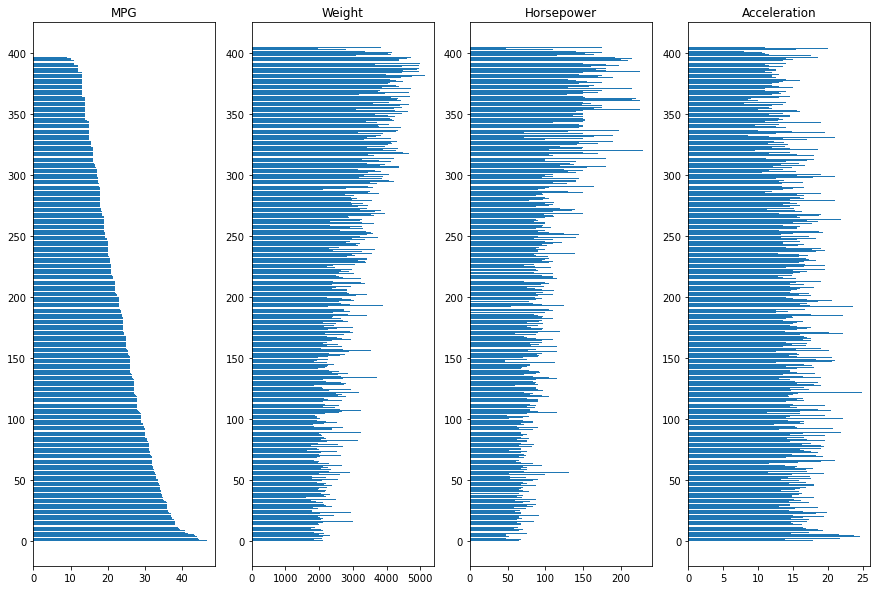

In [22]:
# Creating figures with more than one plot
fig1, axs = plt.subplots(1,4, figsize=(15,10))
axs[0].set_title('MPG')
axs[0].barh(cars.index, cars['MPG'],tick_label=None)

axs[1].set_title('Weight')
axs[1].barh(cars.index, cars['Weight'],tick_label=None)

axs[2].set_title('Horsepower')
axs[2].barh(cars.index, cars['Horsepower'],tick_label=None)

axs[3].set_title('Acceleration')
axs[3].barh(cars.index, cars['Acceleration'],tick_label=None)

In [23]:
### Principal Component Analysis

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import SK_PCA

In [25]:
# Remove categorical columns
names = cars['Car']
origins = cars['Origin']
cars_pca = cars.drop(['Car', 'Origin', 'Model'], axis=1)

In [26]:
## perform PCA
n = len(cars_pca.columns)
dat = StandardScaler().fit_transform(cars_pca)
pca = PCA(n_components=n)
# defaults number of PCs to number of columns in imported data (ie number of
# features), but can be set to any integer less than or equal to that value

pca.fit(dat)

PCA(n_components=6)

In [27]:
## project data into Principal Component space
# 0,1 denote PC1 and PC2; change values for other PCs

xvector = pca.components_[0]  # see 'prcomp(data)$rotation' in R
yvector = pca.components_[1]

xs = pca.transform(dat)[:, 0]  # see 'prcomp(data)$x' in R
ys = pca.transform(dat)[:, 1]

In [28]:
# PCA Biplot

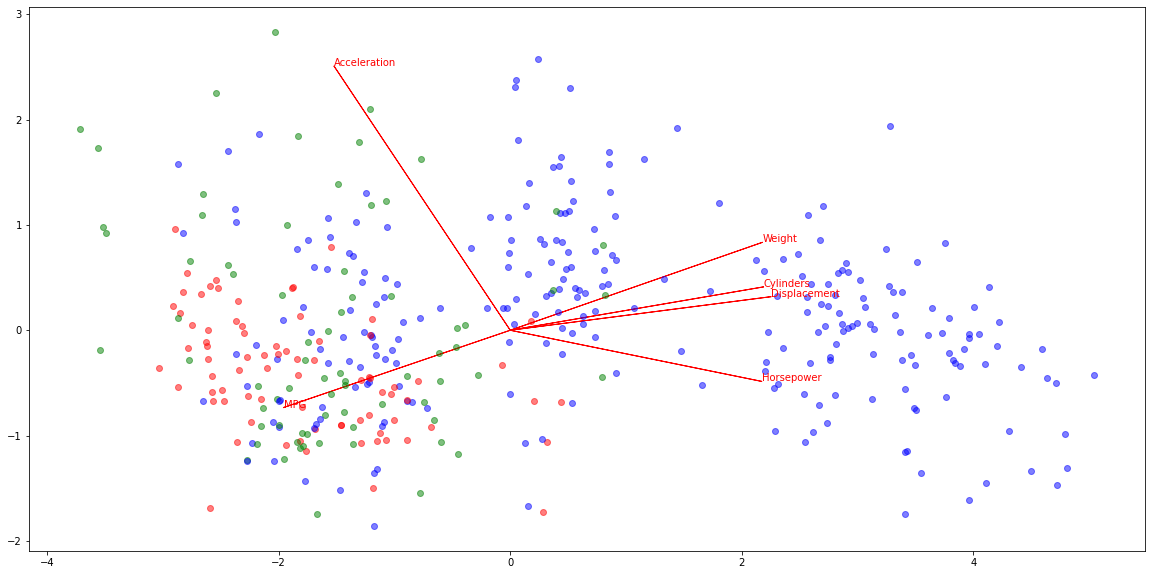

In [29]:
## visualize projections

## Note: scale values for arrows and text are a bit inelegant as of now,
##       so feel free to play around with them

colors = {'US':'b', 'Europe':'g', 'Japan':'r'}

plt.figure(figsize=(20, 10))
for i in range(len(xvector)):
    # arrows project features (ie columns from csv) as vectors onto PC axes
    plt.arrow(0, 0, 
              xvector[i] * max(xs), 
              yvector[i] * max(ys),
              color='r', 
              width=0.0005, 
              head_width=0.0025)
    plt.text(xvector[i] * max(xs) * 1, 
             yvector[i] * max(ys) * 1,
             list(cars_pca.columns.values)[i], 
             color='r')

for i in range(len(xs)):
    # circles project documents (ie rows from csv) as points onto PC axes
    plt.plot(xs[i], 
             ys[i], 
             'bo', 
             color=colors[origins[i]], alpha = 0.5)
    #plt.text(xs[i] * 1.2, ys[i] * 1.2, list(names)[i], color='b')
    
plt.show()

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


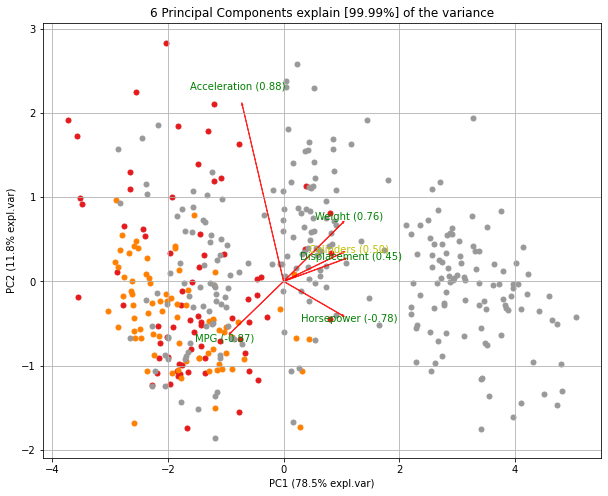

In [31]:
from pca import pca

# Initialize to reduce the data up to the number of componentes that explains 95% of the variance.
model = pca(n_components=n)

# Or reduce the data towards 2 PCs
#model = pca(n_components=n)
pca_cars = pd.DataFrame(dat, columns=cars_pca.columns)

# Fit transform
results = model.fit_transform(pca_cars)

# Scatter first 2 PCs
#fig, ax = model.scatter()

# Make biplot with the number of features
fig, ax = model.biplot(n_feat=n,
                       y = origins,
                       label=False, 
                       legend=False)

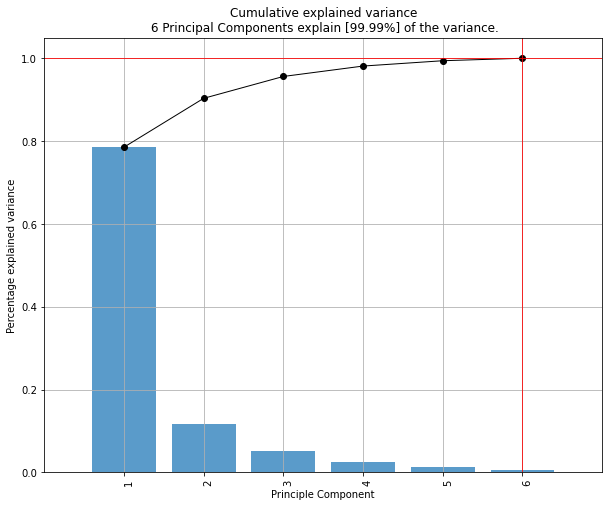

<Figure size 432x288 with 0 Axes>

In [32]:
# Plot explained variance
fig, ax = model.plot()

In [33]:
pca_out = pd.DataFrame({'Car': names, 'Origin': origins,'Component 1': xs, 'Component 2' :ys})

In [34]:
pca_components = pd.DataFrame({'Variables':cars_pca.columns.values,'Loadings X': xvector, 'Loadings Y': yvector})

In [35]:
pca_out.head()

,Car,Origin,Component 1,Component 2
0,Mazda GLC,Japan,-3.035959,-0.355931
1,Honda Civic 1500 gl,Japan,-2.591853,-1.683647
2,Volkswagen Rabbit C (Diesel),Europe,-3.515432,0.983670
3,Volkswagen Pickup,Europe,-3.718648,1.915729
4,Volkswagen Dasher (diesel),Europe,-3.561729,1.730585


In [36]:
pca_components

,Variables,Loadings X,Loadings Y
0,MPG,-0.388135,-0.259004
1,Cylinders,0.433416,0.145219
2,Displacement,0.446194,0.112402
3,Horsepower,0.430415,-0.171411
4,Weight,0.431495,0.294461
5,Acceleration,-0.301608,0.884932


In [37]:
pca_components.to_csv('~/Desktop/PCA Components.csv')

In [38]:
pca_out.to_csv('~/Desktop/PCA Data.csv')